In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from datetime import datetime
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import platform

system = platform.system()

if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'



In [3]:
analysisdata = pd.read_json('../data/getseedcorpdata.json')

In [4]:
analysisdata

,successMsg,data,success
products,success,"[{'id': 'PD00005787', 'name': '디비디비 DIBIDIBI',...",True
similarCorps,success,"[{'corpId': 'CP00016772', 'bizNameKr': '커머스,뷰티...",True
customerSales,success,"{'recentUpdate': '2024-04-24', 'salesBasic': [...",True
customerType,success,"{'recentUpdate': '2024-04-24', 'salesPerson': ...",True
investment,success,"{'recentUpdate': '2020-02-01', 'lastInvestment...",True
organization,success,"{'recentUpdate': '2024-04-25', 'retireRate': 0...",True
finance,success,"{'recentUpdate': '2023-06-03', 'data': [{'year...",True
dataSufficient,success,True,True


## 판매실적

In [5]:
df_salesBasic = pd.DataFrame(analysisdata['data']['customerSales']['salesBasic'])

In [6]:
df_salesBasic['inCome'] = df_salesBasic['count']*df_salesBasic['unitPrice']

In [7]:
df_salesBasic.sort_values('count')

,referenceMonth,rate,count,unitPrice,inCome
35,2024-03,9.6,331,269843.6,89318231.6
29,2023-09,9.4,343,255512.2,87640684.6
30,2023-10,10.3,346,278148.2,96239277.2
34,2024-02,8.8,346,237708.6,82247175.6
32,2023-12,11.0,409,249776.1,102158424.9
28,2023-08,12.6,460,255890.3,117709538.0
31,2023-11,12.7,461,256105.8,118064773.8
33,2024-01,11.7,492,222260.6,109352215.2
27,2023-07,13.0,501,240886.7,120684236.7
25,2023-05,16.4,588,259320.4,152480395.2


In [8]:
with open("../data/pickles/df_salesBasic.pkl", "wb") as f:
    pkl.dump(df_salesBasic, f)

### 판매 건수

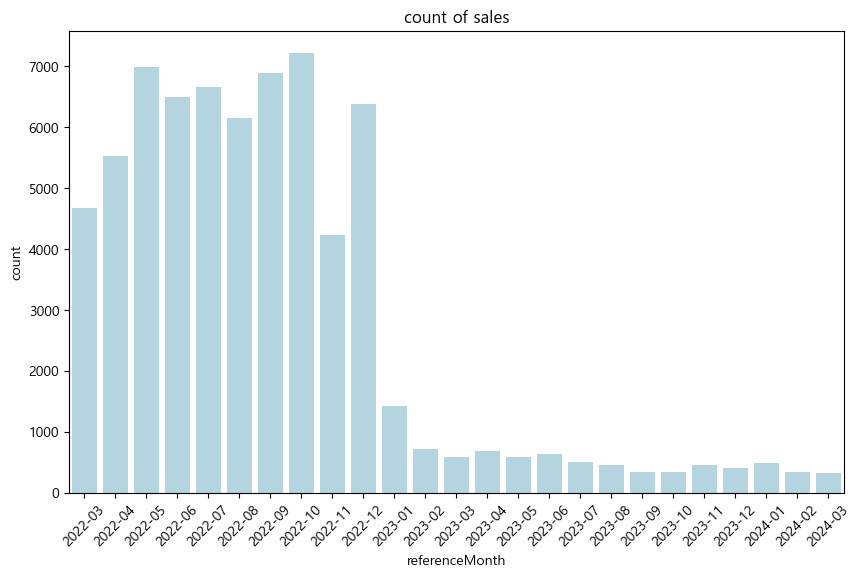

In [9]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='count',color='lightblue')

plt.title('count of sales')
plt.xticks(rotation=45)
plt.show()

### 평균 가격

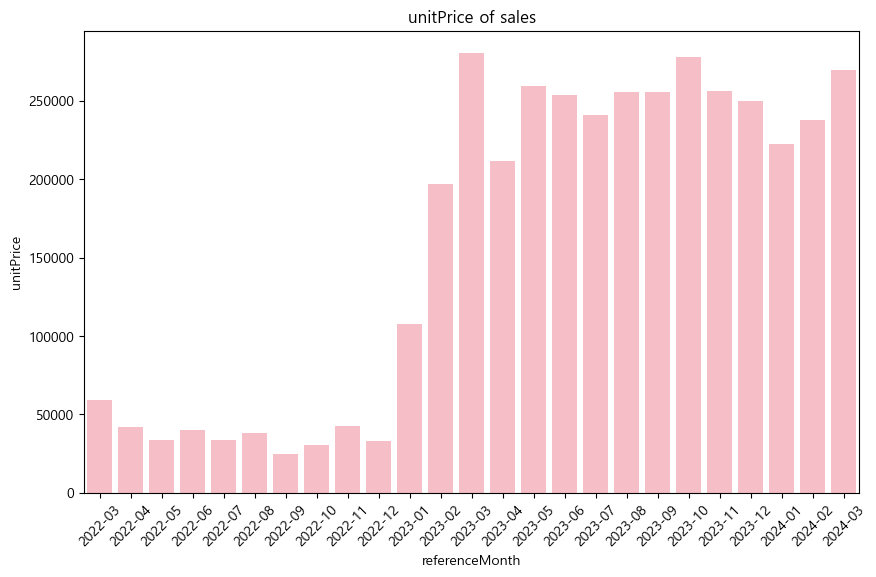

In [10]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='unitPrice',color='lightpink')

plt.title('unitPrice of sales')
plt.xticks(rotation=45)
plt.show()

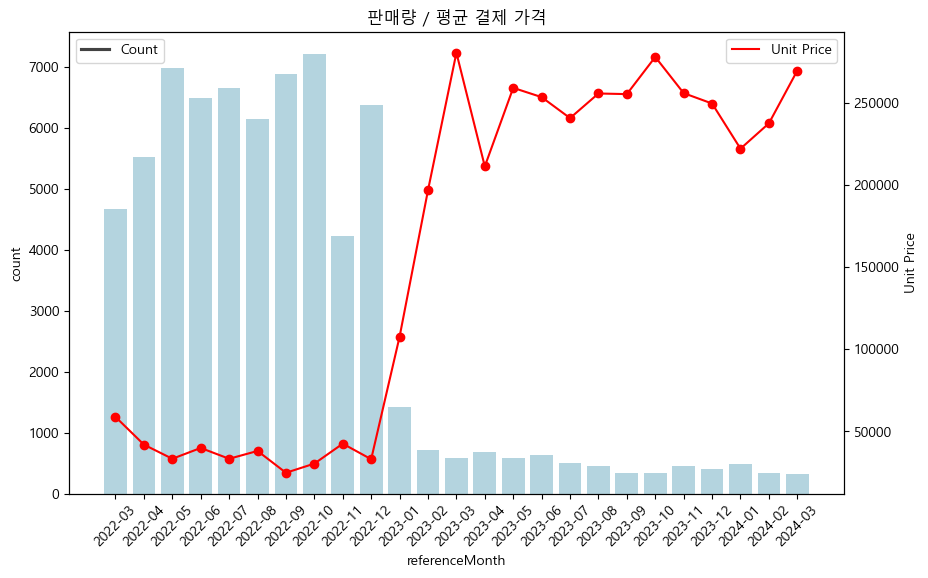

In [39]:
# figure와 axes 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 그래프 (바플롯)
sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='count', color='lightblue', ax=ax1)
ax1.set_title('판매량 / 평균 결제 가격')

# x축 라벨 회전
ax1.tick_params(axis='x', rotation=45)

# 두 번째 그래프 (라인플롯)
ax2 = ax1.twinx()
sns.lineplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='unitPrice', color='red', ax=ax2)
plt.scatter(x=df_salesBasic.query('referenceMonth >= "2022-03"')['referenceMonth'], y=df_salesBasic.query('referenceMonth >= "2022-03"')['unitPrice'], color='red', marker='o')
ax2.set_ylabel('Unit Price')

# 범례 추가
ax1.legend(['Count'], loc='upper left')
ax2.legend(['Unit Price'], loc='upper right')

plt.show()

### 매출

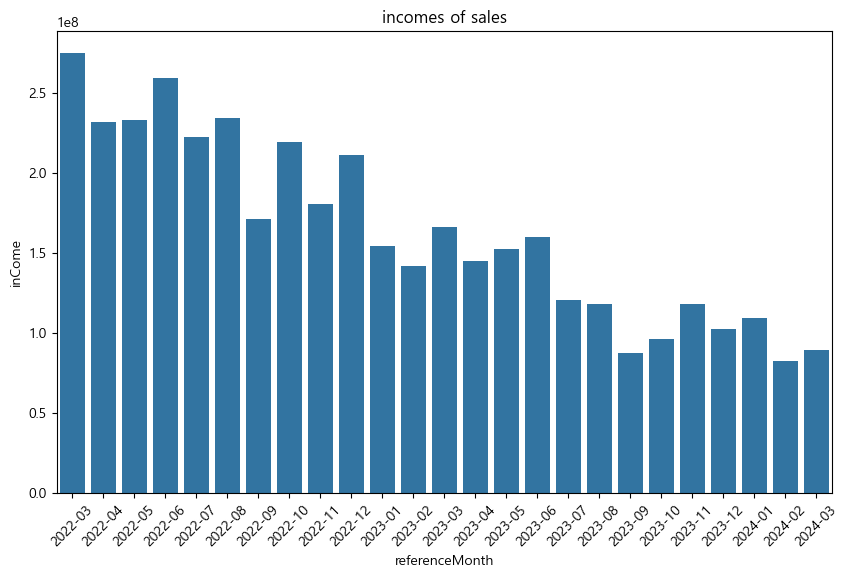

In [12]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='inCome')

plt.title('incomes of sales')
plt.xticks(rotation=45)
plt.show()

## 재구매율

In [13]:
df_salesPeriod = pd.DataFrame(analysisdata['data']['customerSales']['salesPeriod'])

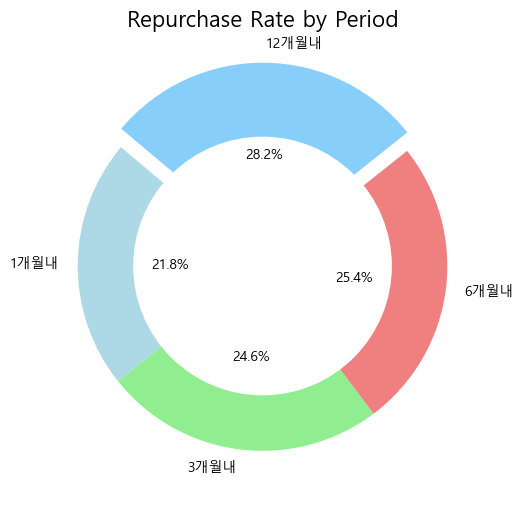

In [14]:

# 데이터
sizes = df_salesPeriod['repurchaseRate']
labels = df_salesPeriod['period']
explode = (0, 0, 0, 0.1)  # 특정 부분을 강조하기 위해 폭발 효과 사용

# 원 그래프 그리기
plt.figure(figsize=(8, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140,pctdistance=0.5, colors=colors)

# 중심에 원을 그려서 원 그래프가 원 모양을 유지하도록 함
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 제목 추가
plt.title('Repurchase Rate by Period', fontsize=16)

# 그래프 보이기
plt.show()

In [15]:
df_salesPeriod['avgPurchaseRate']

0    1.0
1    2.5
2    4.4
3    7.2
Name: avgPurchaseRate, dtype: float64

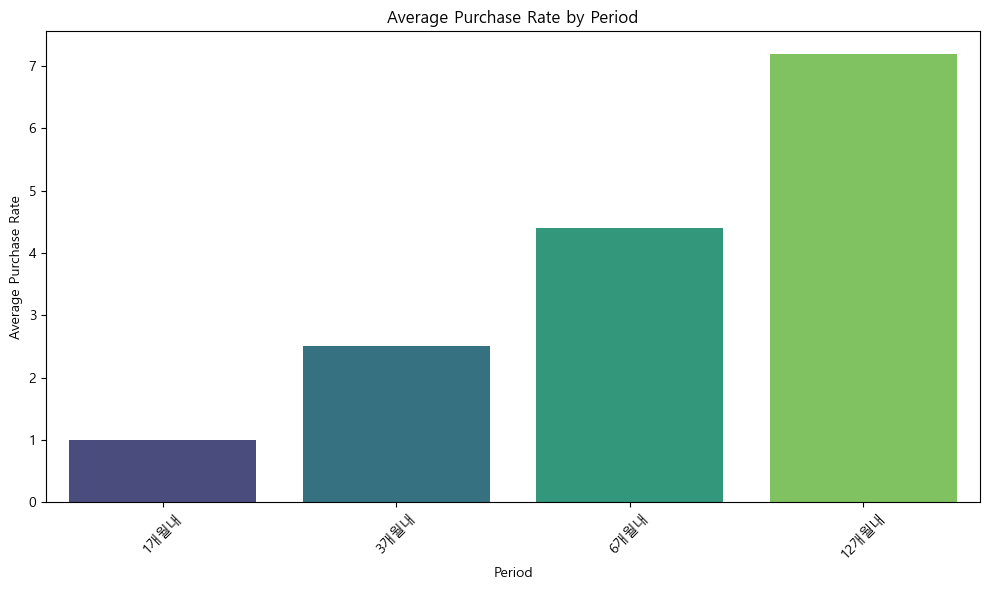

In [16]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesPeriod, x='period', y='avgPurchaseRate', palette='viridis')

plt.title('Average Purchase Rate by Period')
plt.xlabel('Period')
plt.ylabel('Average Purchase Rate')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## 소비자 유형

In [17]:
df_salesPerson = pd.DataFrame(analysisdata['data']['customerType']['salesPerson'])
df_salesFamily = pd.DataFrame(analysisdata['data']['customerType']['salesFamily'])
df_salesIncome = pd.DataFrame(analysisdata['data']['customerType']['salesIncome'])

### 성별 및 연령

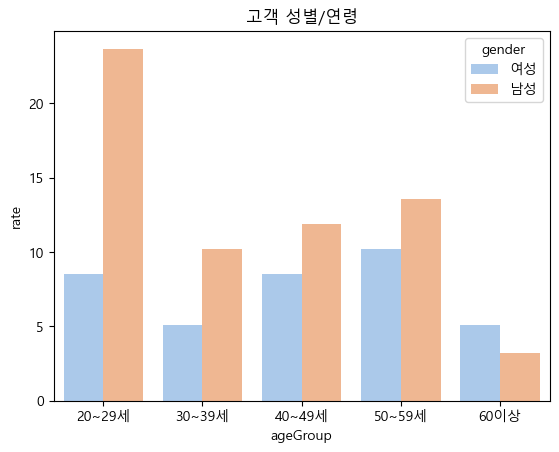

In [18]:
orders = ['20~29세','30~39세','40~49세','50~59세','60이상']

sns.barplot(data=df_salesPerson, x='ageGroup', y='rate', hue='gender', palette='pastel',order=orders)

plt.title('고객 성별/연령')
plt.show()

### 가족구성 및 소득

In [19]:
df_salesIncome

,type,rate
0,2000만원이하,1.7
1,3000만원이하,24.2
2,4000만원이하,10.3
3,5000만원이하,24.1
4,6000만원이하,13.8
5,8000만원이하,12.1
6,1억원이하,5.2
7,1억원초과,8.6


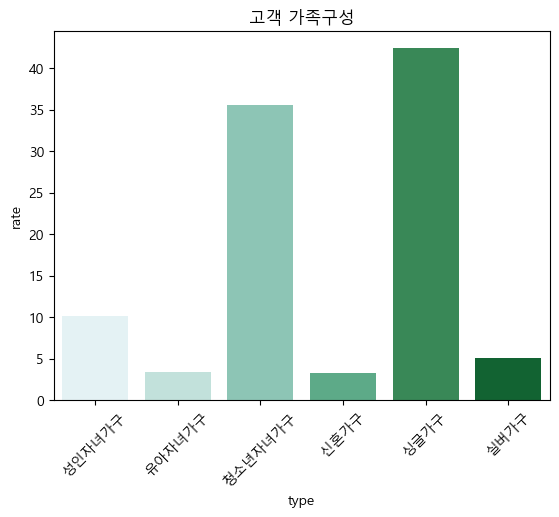

In [20]:
sns.barplot(data=df_salesFamily, x='type', y='rate', palette='BuGn')

plt.xticks(rotation=45)
plt.title('고객 가족구성')
plt.show()


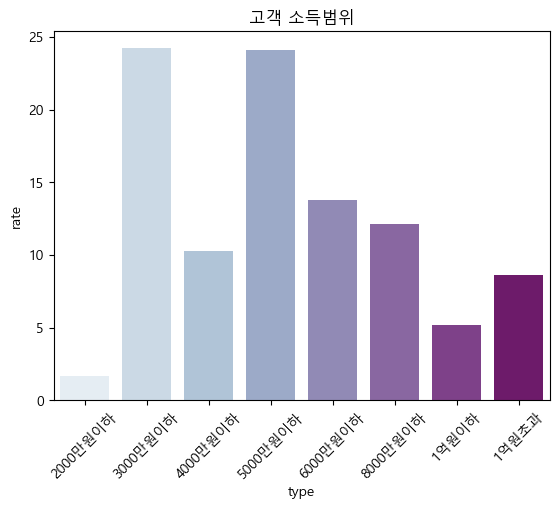

In [21]:
sns.barplot(data=df_salesIncome, x='type', y='rate',palette='BuPu')

plt.xticks(rotation=45)
plt.title('고객 소득범위')
plt.show()
